## General instructions

Please fill out the answers to the questions below in markdown blocks (for questions) and coding blocks (for coding exercises). 

For some programming questions, some hints have already been provided for you. Add additional blocks if you need them (e.g. to explain your answers). Try to answer each question succinctly. 

In the coding exercises, you may use ``pandas``, ``numpy`` and ``scipy`` routines, but **not** scikit-learn (``sklearn``). You may use ``matplotlib`` or ``seaborn`` for plotting.

Submit the completed notebook after filling in all the questions and please make sure that the answers are visible without needing to execute each code block (i.e. so the code block has already been executed). When marking the assignment we will not run any code if this has not been done.

## AI statement

Please state if you used AI tools in preparing your answers, and if so please explain what you used them for. Note that it is not acceptable to directly paste answers or code generated by AI tools to solve these problems. In cases of doubt we may plan an interview to discuss verbally your understanding of the solutions to the exercises before releasing the final grade

## Part 1: Basic Algebra and Data Handling

### Task 1.1 (1 point)

Suppose that you are given a data matrix (X) that summarises the expenditure of 10 different hospitals across a 6 month period, where the the hospitals are stored one per row and the months are stored one per column. Print out a vector that you can multiply this matrix with to yield the following quantities. In other words, give the vector v that causes the matrix-vector product **X * v** to yield the following:
 
1. The difference in the total expenditure for each hospital between the first three and the last three months
2. The total expenditure of the first two months minus the average expenditure for each hospital for the the last four monthmonths

https://numpy.org/doc/2.2/reference/routines.linalg.html

In [1]:
import numpy as np
X = np.random.rand(10,6) # dummy data


#Difference in total expenditure for each hospital between the first three and last three months. 
v1 = np.array([1, 1, 1, -1, -1, -1])

X@v1

v2 = np.array([1,1,-0.25,-0.25,-0.25,-0.25])

X@v2


array([0.86220534, 0.85626928, 0.05969501, 0.44111732, 0.47585788,
       0.32301471, 0.48965985, 0.96147361, 0.32379384, 0.86785134])

### Task 1.2 (1 point)

Write a short piece of code that uses an eigendecomposition to determine the rank of the following matrix. Check your answer by computing the rank directly using the function np.linalg.matrix_rank():

https://numpy.org/doc/2.2/reference/routines.linalg.html

In [2]:
import numpy as np

X = np.array([[ -2., 20., -6.,  7.,  7., 4.],
              [ 9., 5., 9.,  7.,  7., 0.],
              [ -1., 3., 4.,  -2.,  9., -27.],
              [ 8., 11., 2.,  9.,  4., 16.],
              [ 4., 19.,  -3.,  8.,  8., 7.],
              [ 6., 7.,  7., 10.,  4., 11.]])

In [3]:
sym = X.T @ X
print(sym)

eigenvalues = np.linalg.eigvals(sym)
print(eigenvalues)

##TODO
#change 
tol = 1e-10
rank_from_eig = np.sum(eigenvalues > tol)


print(rank_from_eig)



[[ 202.  208.  135.  215.  128.  241.]
 [ 208.  965.  -49.  490.  426.  385.]
 [ 135.  -49.  195.   77.   69.  -44.]
 [ 215.  490.   77.  347.  220.  392.]
 [ 128.  426.   69.  220.  275.  -51.]
 [ 241.  385.  -44.  392.  -51. 1171.]]
[1.89916684e+03+0.00000000e+00j 8.87844522e+02+0.00000000e+00j
 3.54086352e+02+0.00000000e+00j 1.39022859e+01+0.00000000e+00j
 9.25517269e-15+7.94399643e-15j 9.25517269e-15-7.94399643e-15j]
4


In [10]:
rank_direct = np.linalg.matrix_rank(X)
print(rank_direct)

4


### Task 1.3 (2 points)

Download the data below and perform a basic quality control procedure using basic statistical operations. You can assume that the data contain demographic measures plus some biological features (it does not matter what these are for the purposes of this exercies).

Then answer the following  questions: 

1. Which subject has the most missing data? How many missing features does this subject have?
2. Which are the features most likely to contain outliers? How many samples would you remove? Give reasons for your choice

In [12]:
#!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/qc_dataset.csv

--2025-12-06 11:45:24--  https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/qc_dataset.csv
Herleiden van raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Verbinding maken met raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... verbonden.
HTTP-verzoek is verzonden; wachten op antwoord... 200 OK
Lengte: 648561 (633K) [text/plain]
Wordt opgeslagen als: ‘qc_dataset.csv’

qc_dataset.csv      100%[===================>] 633,36K  --.-KB/s    in 0,03s   

2025-12-06 11:45:24 (19,3 MB/s) - '‘qc_dataset.csv’' opgeslagen [648561/648561]



In [1]:
import pandas as pd
qc_dataset = pd.read_csv('/Users/sietsehornstra/Desktop/GitHub/BigDataCourse/Exam/Assignment1/qc_dataset.csv')

qc_dataset.head()
qc_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      501 non-null    int64  
 1   age     501 non-null    int64  
 2   sex     501 non-null    int64  
 3   f0      501 non-null    float64
 4   f1      501 non-null    float64
 5   f2      501 non-null    float64
 6   f3      501 non-null    float64
 7   f4      501 non-null    float64
 8   f5      501 non-null    float64
 9   f6      501 non-null    float64
 10  f7      501 non-null    float64
 11  f8      501 non-null    float64
 12  f9      501 non-null    float64
 13  f10     501 non-null    float64
 14  f11     501 non-null    float64
 15  f12     501 non-null    float64
 16  f13     501 non-null    float64
 17  f14     501 non-null    float64
 18  f15     501 non-null    float64
 19  f16     501 non-null    float64
 20  f17     501 non-null    float64
 21  f18     501 non-null    float64
 22  f1

In [15]:
#1 
qc_dataset['missing'] = qc_dataset.iloc[:, 1:].isna().sum(axis=1)

print(qc_dataset.loc[qc_dataset['missing'].idxmax(), ['id', 'missing']]) 
#qc_dataset['n_missing'] = qc_dataset.iloc[:, 1:].isna().sum(axis=1)
#qc_dataset[['id','n_missing']].sort_values('n_missing', ascending=False).head()


id         217.0
missing      2.0
Name: 217, dtype: float64


#2 Which are the features most likely to contain outliers? How many samples would you remove? Give reasons for your choice

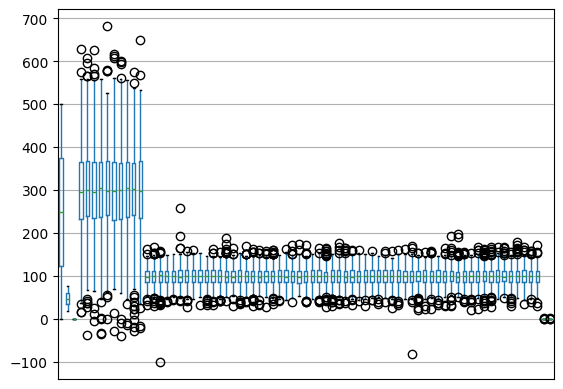

In [16]:
#2 
from matplotlib import pyplot as plt
import seaborn as sns


qc_dataset.boxplot()
plt.xticks([])
plt.show()

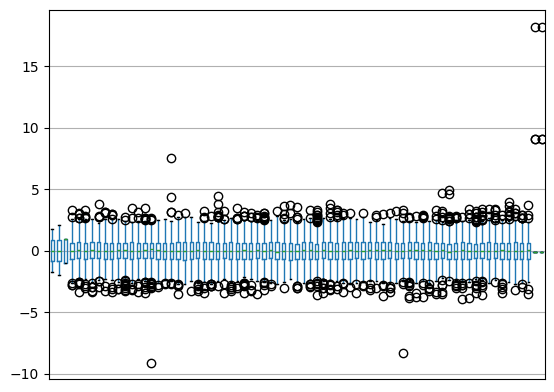

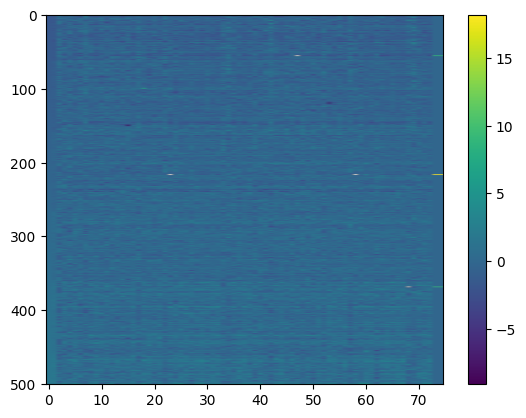

In [22]:
##TODO
# Hier nog alleen kijken naar de kolommen met f, dus niet sex en age erbij
#deze hier beneden horen bij de comment boven
#ct_cols = cam_data.columns[4:-1]
#ct_data_qc = cam_qc[ct_cols]

qc_dataset_z = (qc_dataset - qc_dataset.mean()) / qc_dataset.std()

qc_dataset_z.boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

plt.imshow(qc_dataset_z, aspect='auto')
plt.colorbar()
plt.show()

In [20]:
import numpy as np

qc_dataset.loc[(np.abs(qc_dataset_z) > 5).any(axis=1)]

,id,age,sex,f0,f1,f2,f3,f4,f5,f6,...,f62,f63,f64,f65,f66,f67,f68,f69,n_missing,missing
56,56,26,1,190.702159,247.969784,163.459241,-31.354089,402.315508,107.486818,-8.081772,...,52.379738,69.131127,49.091538,54.568954,67.249118,57.875514,79.397790,30.018779,1,1
100,100,32,0,193.854545,391.606506,267.545634,307.617040,381.313658,211.987862,315.009155,...,97.932938,65.482543,78.293699,116.680594,108.811416,82.270398,95.587164,95.328012,0,0
120,120,29,1,224.117458,320.913824,186.962620,395.071591,278.249027,242.355686,205.642458,...,124.150607,83.855770,91.631225,128.169452,123.157112,111.879454,63.576356,99.465654,0,0
150,150,35,0,278.338510,423.575807,420.653359,363.886247,307.807186,337.925017,317.513736,...,114.646702,124.381114,118.306276,120.540132,96.476799,104.896186,120.361813,123.171027,0,0
217,217,39,1,231.683186,270.933649,66.088100,139.487360,251.024408,200.376635,158.055423,...,67.127177,77.079828,72.256714,108.422977,99.761561,59.923940,93.011582,73.287711,2,2
369,369,66,1,287.795670,358.286388,238.670054,354.395056,277.471181,255.753256,349.238426,...,98.752240,97.016734,103.284010,NaN,65.439147,86.367248,116.314469,99.342547,1,1


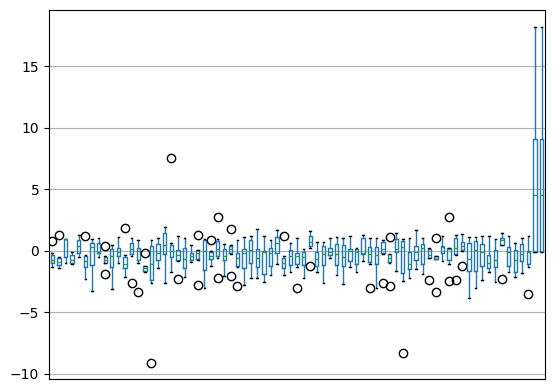

In [23]:
qc_dataset_z.loc[(np.abs(qc_dataset_z) > 5).any(axis=1)].boxplot()
plt.xticks([])  # remove the axis labels to stop the plot getting messy
plt.show()

# in de plot zijn nu de laastse kolommen de n missing dus die moet ik ook nog uit de dataframe hier halen

In [ ]:
# dit is dus een redenatie voor waarom weghalen
#So from this plot, we can see that at least one and possibly more scans may have questionable scan quality. It would be wise to investigate further. For this exercise we can say that we checked these scans and decide to exclude them based on manual inspection of the reconstructed surfaces. We decide to remove all subjects having an EC < -400. **Again, you should be aware that this threshold is arbitrary!**

### Task 1.4 (1 point)

What do we use the Digital Research Environment for?

1. Data collection
2. Data processing and analysis
3. Collaborating on shared data with external parties
4. Archiving
5. Making data FAIR

select all answers that apply.

Everthing except 1, so 2, 3, 4, and 5 are correct. 

# Part 2: Machine learning and statistics

### Task 2.1 (1 point)

1. Describe the function of the parameter $\gamma$ in support vector machines (following the notation given in the lectures). How does it prevent overfitting?
2. Linear models have different kinds of parameters. Briefly describe the different functions of the parameters denoted $w$ and $\theta$ given in the machine learning lecture.

### Task 2.2 (1 point)

Considering the following scenario: 

A researcher wants to train a classifier to predict Parkinson's disease and acquires some neuroimaging data to do this. First, the researcher selects the most informative features from the imaging data using a t-test. Next, the researcher trains a classifier on these features using cross-validation and obtains classification accuracy of 75% for discriminating patients from controls. The researcher shows that this is statistically better than chance (50%) using a binomial test. 

Would you consider this to be a solid workflow? Why or why not?

### Task 2.3 (1 point)

Suppose that you are the data scientist working for clinic that performs biopsies for lung cancer. In this clinic, you know that using a 'gold standard' test, approximately 5% of the samples that are tested come back positive for lung cancer and you test approximately 1000 people per year. You are evaluating a new test that according to the manufacturer has a sensitivity of approximately 80% and a specificity of 95% but is appealing because it is much faster than the gold standard test, meaning that the patients will have their results the same day instead of having to wait a week.

First, write a small block of python code to estimate the accuracy, positive and negative predictive value of the test under the scenario above. 


### Task 2.4 (1 point)

Would you switch to the new test? Give reasons for your answer. Can you think of factors that would change your preference? 

### Task 2.5 (1 point)

Consider the following scenario: a researcher would like to use a clustering algorithm to find subtypes of asthma. The researcher acquires biomedical data, including: 3 lung function parameters from a breath outflow test, 10 blood-based markers (that you can assume are known to be associated with asthma) and 100 genetic variables (that have each been associated with asthma in at least one study). The researcher trains a K-means algorithm across 2-5 clusters and finds that the 5 cluster solution is the most reproducible (statistically significant at p < 0.01). 

Please answer the following questions: 

1. Would you consider this to be acceptable evidence to determine that biological subtypes exist? 
2. Please briefly outline what addtional validation steps you would recommend to determine whether the clusters can be used to improve prediction of outcomes in asthma


### Task 2.6 (1 point)

Matrix decomposition techniques are important ways to reduce dimensionality in big data cohorts. Provide brief answers to the following questions: 

1. What are the steps needed to perform principal components analysis (PCA) on the basis of an eigendecomposition?
2. What is the difference between running linked ICA on multimodal data from concatenating the data and running PCA?  

## Part 3: Analysis of Parkinson's disease dataset

For this part of the assignment, we will work with electronic measurements of voice characteristics from 42 people with early-stage Parkinson's disease. These participants were included in a six-month trial of a telemonitoring device for remote symptom progression monitoring. The motivation is that Parkinson's disease affects the characteristics of the voice in a way that might be associated with disease progression. See [here](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring) for a description of the data. Note that the UPDRS (Unified Parkinson's Disease Rating Scale) is a standard scale for rating the symptoms of Parkinson's disease across different domains.

For this assignment, we have split the dataset into two parts, which you can download here:

In [ ]:
#!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset1.csv
#!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/parkinsons_updrs_dataset2.csv

USE GLM PCA PRACTICAL ~**DELETE THIS**~

### Task 3.0 (1 point, bonus question)
Load the data and count the number of rows and columns

In [25]:
parkinsons_updrs_dataset1 = pd.read_csv('/Users/sietsehornstra/Desktop/GitHub/BigDataCourse/Exam/Assignment1/parkinsons_updrs_dataset1.csv')

parkinsons_updrs_dataset2 = pd.read_csv('/Users/sietsehornstra/Desktop/GitHub/BigDataCourse/Exam/Assignment1/parkinsons_updrs_dataset2.csv')

In [35]:
print('the parkinsons_updrs_dataset1 has '+ str(parkinsons_updrs_dataset1.shape[0])+' rows and '+str(parkinsons_updrs_dataset1.shape[1])+' columns') 


print('the parkinsons_updrs_dataset2 has '+ str(parkinsons_updrs_dataset2.shape[0])+' rows and '+str(parkinsons_updrs_dataset2.shape[1])+' columns') 


the parkinsons_updrs_dataset1 has 4068 rows and 23 columns
the parkinsons_updrs_dataset2 has 1807 rows and 23 columns


### Task 3.1 (2 points)

Your first task is to perform PCA on the first data matrix ("parkinsons_updrs_dataset1"), then:

* plot the eigenvalues sorted from largest to smallest
* print the number of components you would need to retain 99.9% of the variance in the data

In [37]:
# basic modules
import os
import sys
import numpy as np
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt

In [41]:
##TODO
#data schalen? 
# alleen belangrijke kolommen includeren 

parkinsons_updrs_dataset1_z = (parkinsons_updrs_dataset1 - parkinsons_updrs_dataset1.mean()) / parkinsons_updrs_dataset1.std()

In [42]:
x = parkinsons_updrs_dataset1_z
m = np.mean(x,0)
print(len(m))
x = x - np.tile(m,[np.size(x,0),1])
covmat = np.cov(x.T)
[evals, evecs] = la.eig(covmat)
evals = np.real(evals)

23


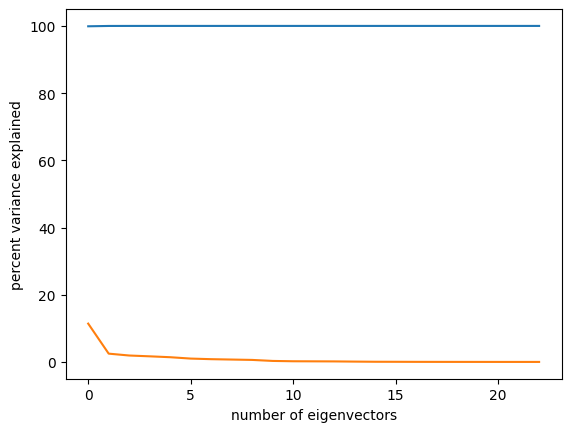

In [43]:
plt.plot(evals)
plt.show()

pve = np.cumsum(evals)/np.sum(evals)*100
plt.figure()
plt.plot(range(0,np.size(evals)),pve)
plt.xlabel('number of eigenvectors');
plt.ylabel('percent variance explained');

In [40]:
keep = pve<99.9
print(keep)

[ True False False False False False False False False False False False
 False False False False False False False False False False False]


### Task 3.2 (1 point)

Your next task is to fit a GLM to predict symptom severity ('total_UPDRS') on the basis of age, sex and the 16 biomedical voice measurements using only the first part of the Parkinson dataset. Don't forget to account for the fact that the symptom severity does not have a zero mean. Print out the regression coefficients and make a plot of them

### Task 3.3 (1 point)

Now, evaluate how accurately this model can predict the true symptom scores. To do this compute the correlation between the true and predicted symptom scores as well as the explained variance score. Print these values. 

Hint: the explained variance can be computed as $1-var(y-\hat{y})/var(y)$ where $y$ and $\hat{y}$ are the true and predicted labels respectively.

### Task 3.4 (1 point)

Now compute the predictions on the second dataset using the coefficients estimated on the first dataset. Compute and print the correlation and explained variance as above

### Task 3.5 (1 point)

Now, we are going to interpret these results. Please answer the following questions:

1. Can you see evidence for overfitting? why or why not?  
2. Which do you think might be the most important explanatory variables ? Explain why you think that

### Task 3.6 (2 points)

Now write a piece of code to do PCA on the set of features mentioned in task 3.2 above (i.e. age, sex and the 16 biomedical voice measurements) from the first dataset. 

Then predict the total UPDRS score for the second dataset on the basis of the first 3 principal components. In order to make sure this is unbiased do this in a way that ensures the second dataset is completely independent (i.e. as if someone else has it). 

Compute the explained variance and compare with what you have above. In your opinion does using three principal components provide adequate compression for this task? Why or why not?

_Hint: you will need to project the data onto the principal components. This can be done efficiently using a matrix operation_